<a href="https://colab.research.google.com/github/nanoalbert/Trabalho-de-Fundamentos-da-IA/blob/main/Classifica%C3%A7%C3%A3o_de_Doen%C3%A7as_Card%C3%ADacas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2
Sklearn: 1.6.1
Matplotlib: 3.10.0
Keras: 3.10.0


#  Bibliotecas

- Importa bibliotecas importantes (Python, Pandas, NumPy, Sklearn, Matplotlib e Keras).  
- Imprime no console a **versão** de cada biblioteca.  
- Útil para verificar se o ambiente está configurado corretamente.  


In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

# visualização
- Importa ferramentas de visualização:  
  - `matplotlib.pyplot` para gráficos gerais.  
  - `scatter_matrix` do Pandas para matrizes de dispersão.  
  - `seaborn` para gráficos estatísticos.  
- Prepara o ambiente para produzir visualizações exploratórias.  


In [ ]:
# read the csv
cleveland = pd.read_csv('/content/heart.csv')

#  Dataset

- Lê o arquivo **heart.csv** usando `pandas.read_csv`.  
- Armazena o conteúdo do CSV no DataFrame `cleveland`.  
- Usado para carregar o dataset de doenças cardíacas no Google Colab (`/content/`).  
- Se certifique de baixar o dataset e fazer o upload nos


In [ ]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (1025, 14)
age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64


#  Tamanho do Dataset
- mostra o tamanho do dataet

In [ ]:
# print the last twenty or so data points
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#  Visualização parcial

 Mostra as linhas do índice **280 até o final** do DataFrame `cleveland`.  


In [ ]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Limpeza básica

- Remove entradas iguais a `"?"` do DataFrame.  
- Exibe as linhas do índice **280 em diante** após a limpeza.  


In [ ]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Remoção de NaN

Esta célula remove todas as linhas que contêm valores NaN no DataFrame `data` e, em seguida, exibe as linhas a partir do índice 280 após essa filtragem.


In [ ]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


# Estrutura do DataSet

Esta célula imprime a quantidade de linhas e colunas do DataSet `data`, seguida dos tipos de dados presentes em cada coluna.


In [ ]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


# Conversão para Numérico

Esta célula converte todas as colunas do dataset `data` para valores numéricos usando `pd.to_numeric`, permitindo análises e modelagens que dependem de tipos numéricos, e depois exibe os tipos de dados resultantes.


In [ ]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Estatísticas descritivas

Esta célula utiliza o método `describe()` para gerar estatísticas resumidas do dataset `data`, como média, desvio padrão, valores mínimos, máximos e quartis, oferecendo uma visão geral das distribuições das variáveis numéricas.


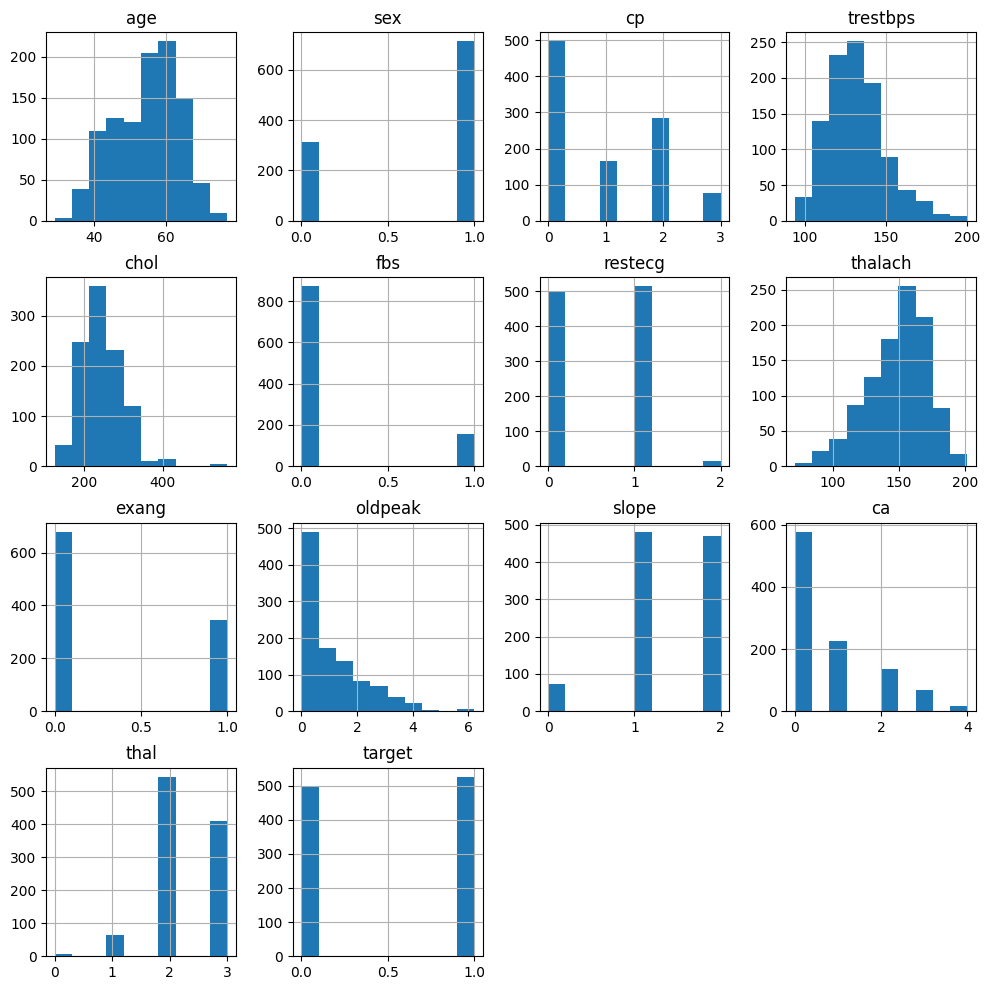

In [ ]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

# Histogramas

Esta célula gera histogramas para todas as variáveis do dataset `data`, permitindo visualizar a distribuição de cada atributo individualmente. Em seguida, exibe o conjunto de gráficos usando `plt.show()`.


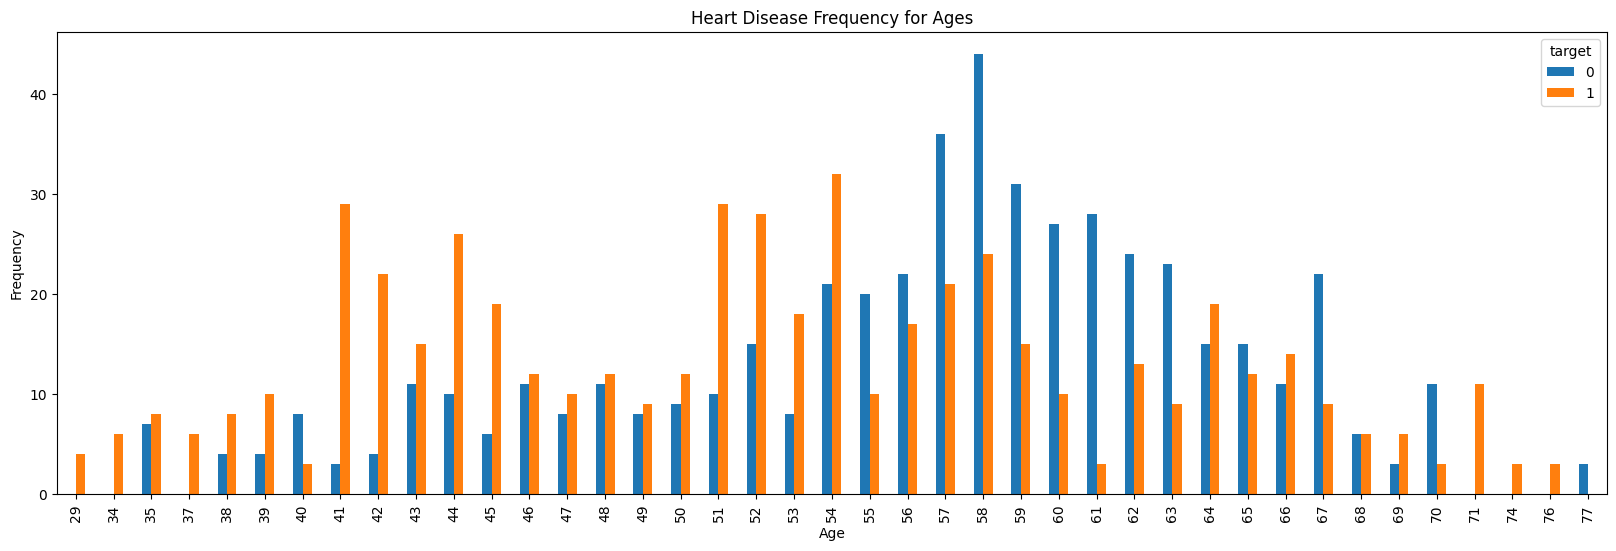

In [ ]:
# Gráfico de barras mostrando a frequência de doença cardíaca em cada idade
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Frequência por Idade

Esta célula cria uma tabela de frequência entre `age` e `target` usando `pd.crosstab`, mostra um gráfico de barras mostrando quantos casos com e sem doença cardíaca existem em cada idade e, por fim, exibe o gráfico.


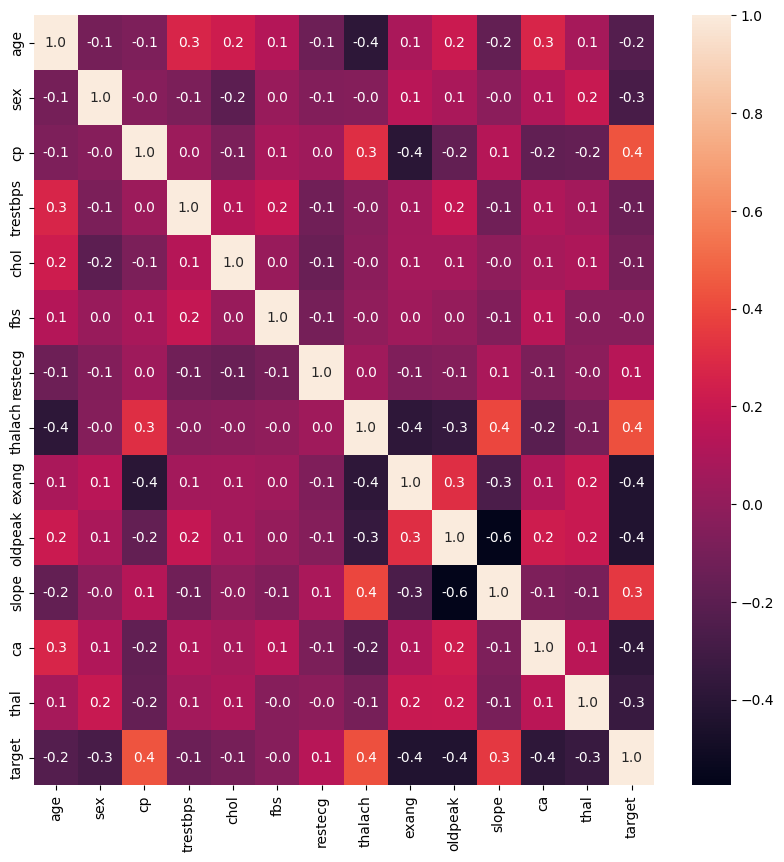

In [ ]:
# Mapa de calor mostrando a correlação entre todas as variáveis do dataset
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

# Correlação

Esta célula calcula a matriz de correlação do dataset e exibe um mapa de calor com os valores anotados, permitindo visualizar a força das relações entre todas as variáveis.


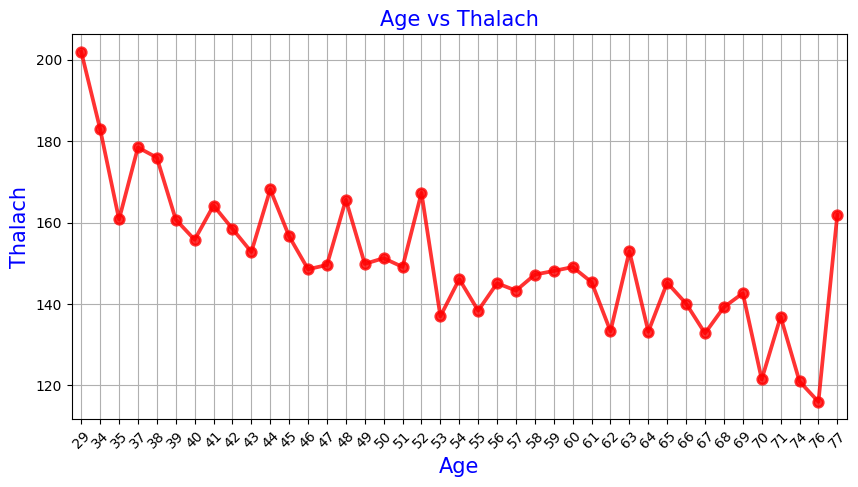

In [ ]:
# Calcula o valor médio de 'thalach' para cada idade e plota a relação Age vs Thalach
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

# Idade vs Thalach

Esta célula calcula a média de `thalach` (frequência cardíaca máxima atingida) para cada idade presente no dataset. Primeiro, obtém todas as idades únicas e conta quantos registros existem para cada idade. Em seguida, percorre cada idade para calcular manualmente a média de `thalach`. Por fim, plota um gráfico do tipo *pointplot* mostrando como a média de `thalach` varia ao longo das idades.


In [ ]:
X = np.array(data.drop(columns=['target']))
y = np.array(data['target'])

# Separação de Variáveis

Esta célula cria a matriz de atributos `X`, contendo todas as colunas do dataset exceto `target`, e o vetor `y`, composto apenas pelos valores da coluna `target`, preparando os dados para modelagem.


In [ ]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

# Mostra o array
Esta célula mostra o array gerado pelo procedimento anterior.

In [ ]:
#Etapa de normalização dos dados
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

# Normalização

Esta célula normaliza o dataset `X` subtraindo a média de cada coluna e dividindo pelo desvio padrão correspondente, garantindo que todas as variáveis fiquem na mesma escala antes da modelagem.


In [ ]:
X[0]

array([-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
       -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
        0.99543334,  1.20922066,  1.08985168])

# Mostra o array
Esta célula mostra o array gerado pelo procedimento anterior.

In [ ]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

# Divisão em Treino e Teste

Esta célula divide os dados em conjuntos de treinamento e teste, preservando a proporção das classes por meio de `stratify=y`, usando 20% dos dados para teste e um estado aleatório fixo para reprodutibilidade.


In [ ]:
# convert the data to categorical labels
from keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(820, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# Codificação Categórica

Esta célula converte os valores do vetor de rótulos (`y_train` e `y_test`) para o formato categórico *one-hot*, gerando `Y_train` e `Y_test` adequados para modelos de classificação do Keras. Em seguida, exibe o formato do dataset convertido e as primeiras linhas resultantes.


In [ ]:
X_train[0]

array([ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
        2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
       -0.6241209 ,  2.17981673, -0.52212231])

# Amostra do Dataset

Esta célula exibe o primeiro vetor de atributos presente em `X_train`, permitindo visualizar seus valores após a normalização.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 378 (1.48 KB)

 Trainable params: 378 (1.48 KB)

 Non-trainable params: 0 (0.00 B)

None


# Definição do Modelo

Esta célula define uma função que constrói um modelo neural sequencial com duas camadas densas intermediárias (com regularização L2 e dropout) e uma camada final `softmax` para classificação binária. Também compila o modelo usando a função de perda `categorical_crossentropy` e o otimizador RMSProp. Ao final, instancia o modelo e exibe seu resumo estrutural.


In [ ]:
# fit the model to the training data
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5802 - loss: 0.6752 - val_accuracy: 0.8146 - val_loss: 0.5967
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8059 - loss: 0.5541 - val_accuracy: 0.8390 - val_loss: 0.5157
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8542 - loss: 0.5164 - val_accuracy: 0.8585 - val_loss: 0.4694
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8552 - loss: 0.4654 - val_accuracy: 0.8244 - val_loss: 0.4410
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8650 - loss: 0.4463 - val_accuracy: 0.8341 - val_loss: 0.4132
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8517 - loss: 0.4362 - val_accuracy: 0.8146 - val_loss: 0.3940
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8698 - loss: 0.3831 - val_accuracy: 0.8195 - val_loss: 0.3746
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8425 - loss: 0.4099 - val_accuracy: 0.8244 - val_loss

# Treinamento

Esta célula treina o modelo neural usando o dataset de treinamento por 50 épocas com batch size de 10, registrando também o desempenho no dataset de teste para fins de validação durante o treinamento.


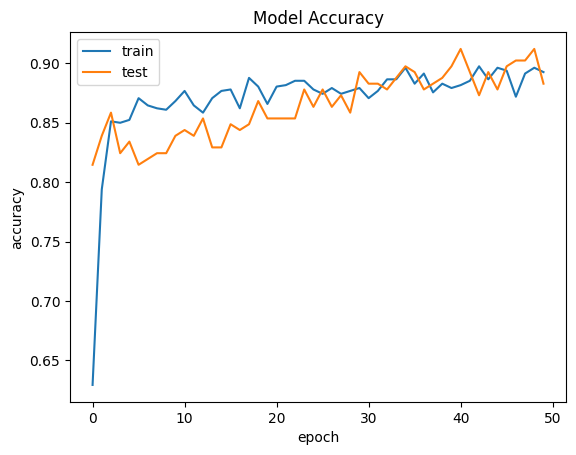

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Acurácia por Época

Esta célula mostra a evolução da acurácia do modelo ao longo das épocas, comparando o desempenho no dataset de treino com o dataset de validação, permitindo visualizar possíveis padrões como overfitting ou melhoria consistente durante o treinamento.


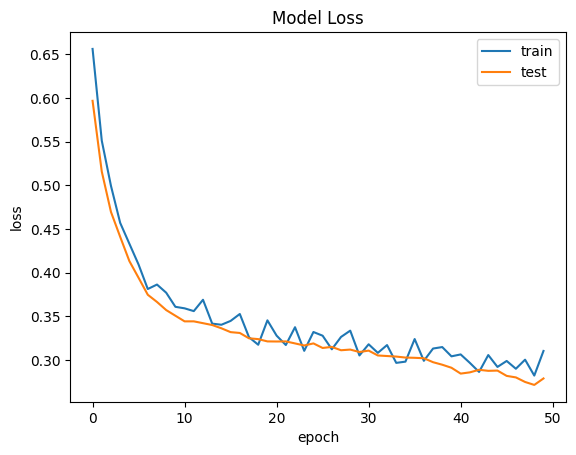

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Perda por Época

Esta célula plota a evolução da função de perda durante o treinamento, mostrando a perda no dataset de treino e no dataset de validação, o que ajuda a identificar estabilidade, overfitting ou divergência do modelo.


In [ ]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0]


# Conversão Binária

Esta célula transforma o problema em uma classificação binária, convertendo todos os valores maiores que 0 em 1 tanto no conjunto de treino quanto no de teste. Em seguida, exibe as primeiras 20 entradas resultantes.


In [ ]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

None


# Modelo Binário

Esta célula define e compila um modelo neural voltado para classificação binária, com duas camadas densas intermediárias (regularização L2 e dropout) e uma saída com ativação sigmoid. Em seguida, instancia o modelo e mostra seu resumo estrutural.


In [ ]:
# fit the binary model on the training data
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6617 - loss: 0.6798 - val_accuracy: 0.8195 - val_loss: 0.6045
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7926 - loss: 0.5657 - val_accuracy: 0.8293 - val_loss: 0.5004
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8494 - loss: 0.4830 - val_accuracy: 0.8390 - val_loss: 0.4333
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8425 - loss: 0.4179 - val_accuracy: 0.8341 - val_loss: 0.3962
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8271 - loss: 0.4034 - val_accuracy: 0.8341 - val_loss: 0.3776
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8221 - loss: 0.4106 - val_accuracy: 0.8244 - val_loss: 0.3654
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8507 - loss: 0.3755 - val_accuracy: 0.8341 - val_loss: 0.3555
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8671 - loss: 0.3563 - val_accuracy: 0.8341 - val_loss:

# Treinamento Binário

Esta célula treina o modelo binário usando o dataset de treino, registrando também o desempenho no dataset de validação ao longo de 50 épocas com batch size de 10.


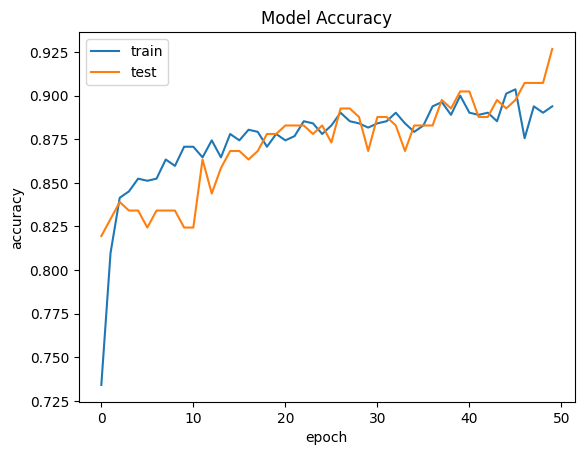

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Acurácia por Época

Esta célula mostra a evolução da acurácia do modelo ao longo das épocas, exibindo as curvas de desempenho no dataset de treino e no dataset de validação para facilitar a visualização de melhorias, estabilidade ou possíveis sinais de overfitting.


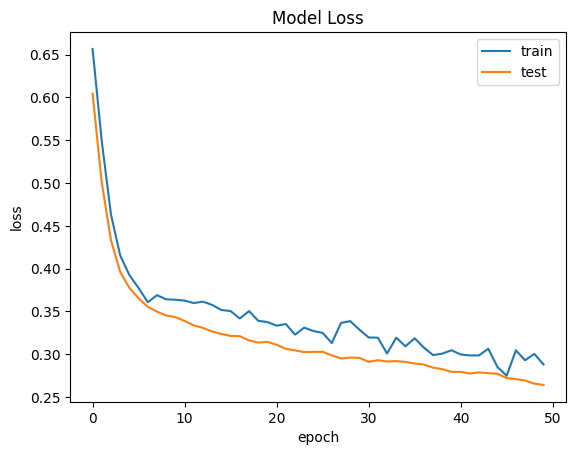

In [ ]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Perda por Época

Esta célula mostra como a função de perda evolui durante o treinamento, comparando os valores obtidos no dataset de treino com aqueles do dataset de validação, o que ajuda a identificar padrões como estabilidade, melhora contínua ou overfitting.


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Resultados para o modelo categórico
Acurácia: 0.8829268292682927
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       100
           1       0.85      0.94      0.89       105

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



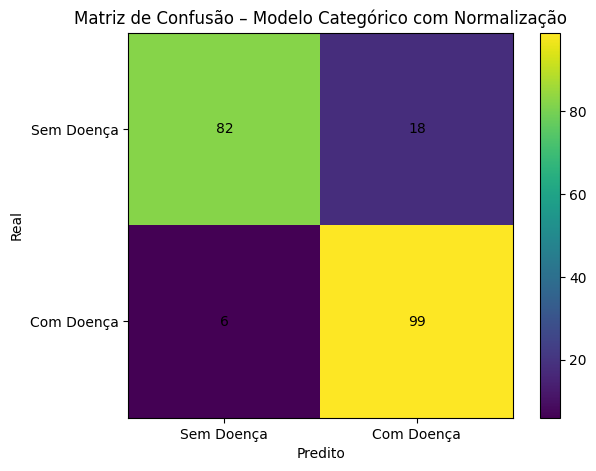

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# gerar previsões
categorical_pred = np.argmax(model.predict(X_test), axis=1)

# imprimir métricas (accuracy + classification report)
print("Resultados para o modelo categórico")
print("Acurácia:", accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

# calcular matriz de confusão
cm = confusion_matrix(y_test, categorical_pred)

# plotar matriz
plt.figure(figsize=(7, 5))

im = plt.imshow(cm, cmap='viridis')

# barra lateral
plt.colorbar(im)

# escrever valores dentro dos quadrantes
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

# rótulos dos eixos (como na versão do binário)
plt.xticks([0, 1], ['Sem Doença', 'Com Doença'])
plt.yticks([0, 1], ['Sem Doença', 'Com Doença'])

plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão – Modelo Categórico com Normalização")

plt.show()


# Avaliação Completa do Modelo Categórico

Esta célula avalia o modelo categórico aplicando previsões ao dataset de teste, calcula a acurácia e mostra o *classification report* com métricas detalhadas. Em seguida, gera e mostra a matriz de confusão em formato visual, incluindo um mapa de cores e os valores numéricos dentro de cada célula, permitindo analisar claramente acertos e erros entre as classes “Sem Doença” e “Com Doença”.


Resultados para o modelo binário
Acurácia: 0.926829268292683
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       100
           1       0.92      0.93      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



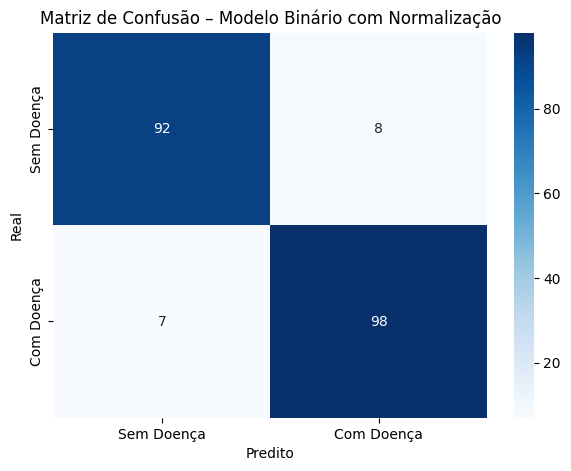

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar previsões APENAS UMA VEZ para evitar retracing
binary_pred = binary_model.predict(X_test, verbose=0)
binary_pred = np.round(binary_pred).astype(int).flatten()

print("Resultados para o modelo binário")
print("Acurácia:", accuracy_score(y_test, binary_pred))
print(classification_report(y_test, binary_pred))

cm = confusion_matrix(y_test, binary_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sem Doença','Com Doença'],
            yticklabels=['Sem Doença','Com Doença'])

plt.title('Matriz de Confusão – Modelo Binário com Normalização')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


# Avaliação do Modelo Binário

Esta célula aplica o modelo binário ao dataset de teste para gerar previsões, calcula a acurácia e mostra o *classification report*. Em seguida, mostra a matriz de confusão usando um heatmap com rótulos claros para “Sem Doença” e “Com Doença”, permitindo visualizar facilmente acertos e erros entre as duas classes.
